### STORY

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

### FEATURES MEANING

-Attrition Flag: This is our target variable, means whether our customer decided to leave the organization or that there is a high probability the customer will leave.\
-Gender: Male or Female\
-Customer age: Age of the customer\
-Income category: To which income category does the customer belongs to.\
-Card category: Which card category does the customer have?\
-Months Inactive: Amount of inactivity when using the credit card.\
-Credit Limit: Credit Limit the customer currently has.\
-Total Revolving Balance: The unpaid portion that carries over to the next month when a customer does not pay.\
-Average Utilization Ratio: Measures how much credit you are using compared to how much you have available.\
-Open to buy: The amount of credit available at a given time on a credit card holders account. Thus, the average open to buy is the average credit available allocated to a specific customer.
-Total_Relationship_Count: total number of products held by the customers (cards, accounts, etc.)\
-Contacts_count_12_mont: I guess it holds the number of times the bank contacted the customer and/or viceversa. There doesn't seem to have any relationship with other fields\ (e.g. contact clients that left the bank, customers with revolving balance, etc). I guess it has to do with ad campaigns.\
-Total_Amt_Chng_Q4_Q1: represents how much the customer increased their expenditure when comparing the 4th quarter agains the 1st.\
-Total_Ct_Chng_Q4_Q1: similar to the previous but in number of transactions.
-The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores, as keeping it below 30% is supposed\ to help increase the scoring.


Avg_Utlization_Ratio-It is the ratio of (credit card spent + money withdrawal)/(Total available limit for credit card spends + Total money withdrawal limit)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from chart_studio import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly as py
from plotly import tools
import plotly.express as px
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv(r'BankChurners.csv')
data.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [3]:
data=data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### SOME STATISTICS FROM OUR ALL DATASET

In [5]:
data.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [6]:
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [7]:
data.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [8]:
data.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

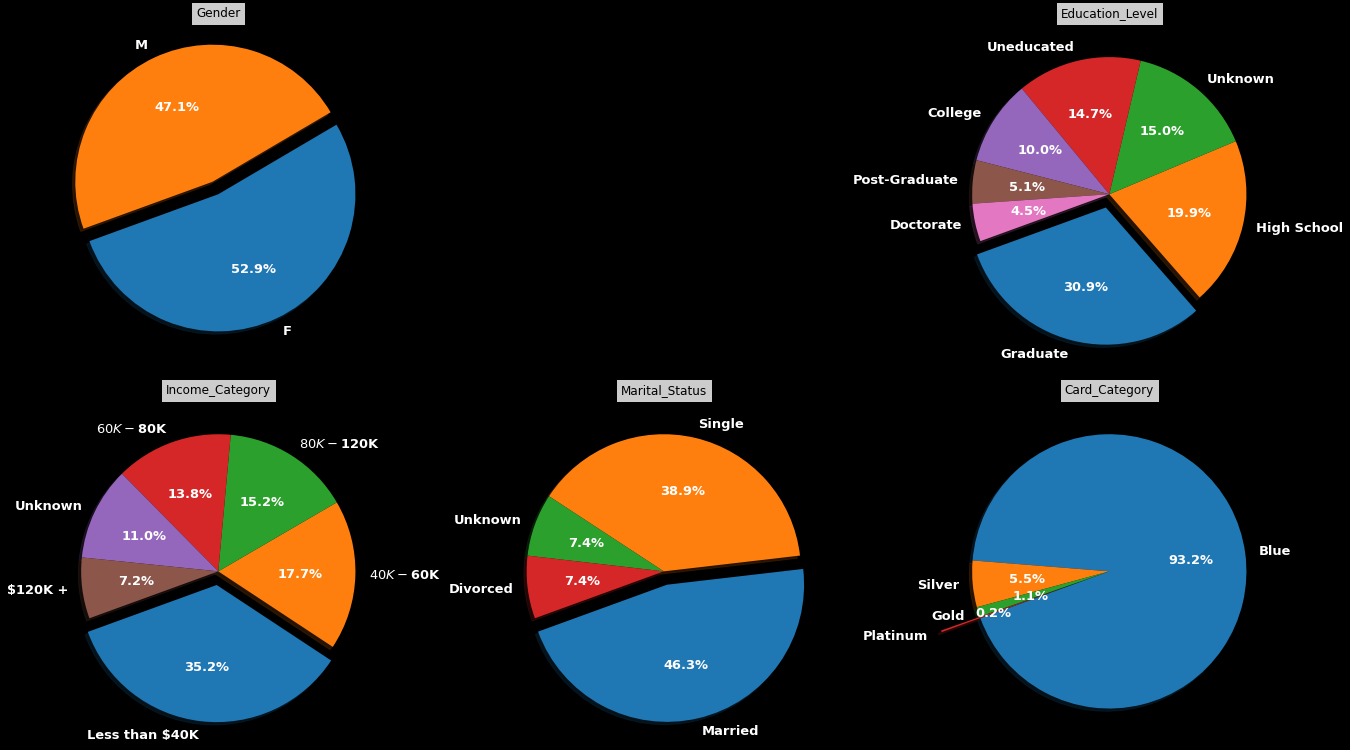

In [9]:
# Make square figures and axes
the_grid = GridSpec(2, 3)
fig = plt.figure(figsize=(20,20))
textprops={"color":"white","weight":"bold"}
plt.subplots_adjust(left=0.1, right=1, bottom=0.4, top=0.9, wspace=0.1, hspace=0.1)


plt.subplot(the_grid[0, 0], aspect=1)
data['Gender'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200, fontsize=13,explode=(0,0.1),textprops=textprops)  
plt.title("Gender", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Gender")

plt.subplot(the_grid[0, 2], aspect=1)
data['Education_Level'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200,explode=(0.1,0,0,0,0,0,0),fontsize=13,textprops=textprops) 
plt.title("Education_Level", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Education_Level")

plt.subplot(the_grid[1, 1], aspect=1)
data['Marital_Status'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6),autopct='%1.1f%%',shadow = True, startangle=200,fontsize=13,explode=(0.1,0,0,0),textprops=textprops)  
plt.title("Marital_Status", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Marital_Status")

plt.subplot(the_grid[1, 0], aspect=1)
data['Income_Category'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200,fontsize=13,explode=(0.1,0,0,0,0,0),textprops=textprops)
plt.title("Income_Category", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Income_Category",loc=4)

plt.subplot(the_grid[1, 2], aspect=1)
data['Card_Category'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200,  fontsize=13,textprops=textprops,explode=(0,0,0,0.3))
plt.title("Card_Category", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Card_Category")

fig.set_facecolor('black')

In [10]:
data_Attrited=data[data['Attrition_Flag']=='Attrited Customer']

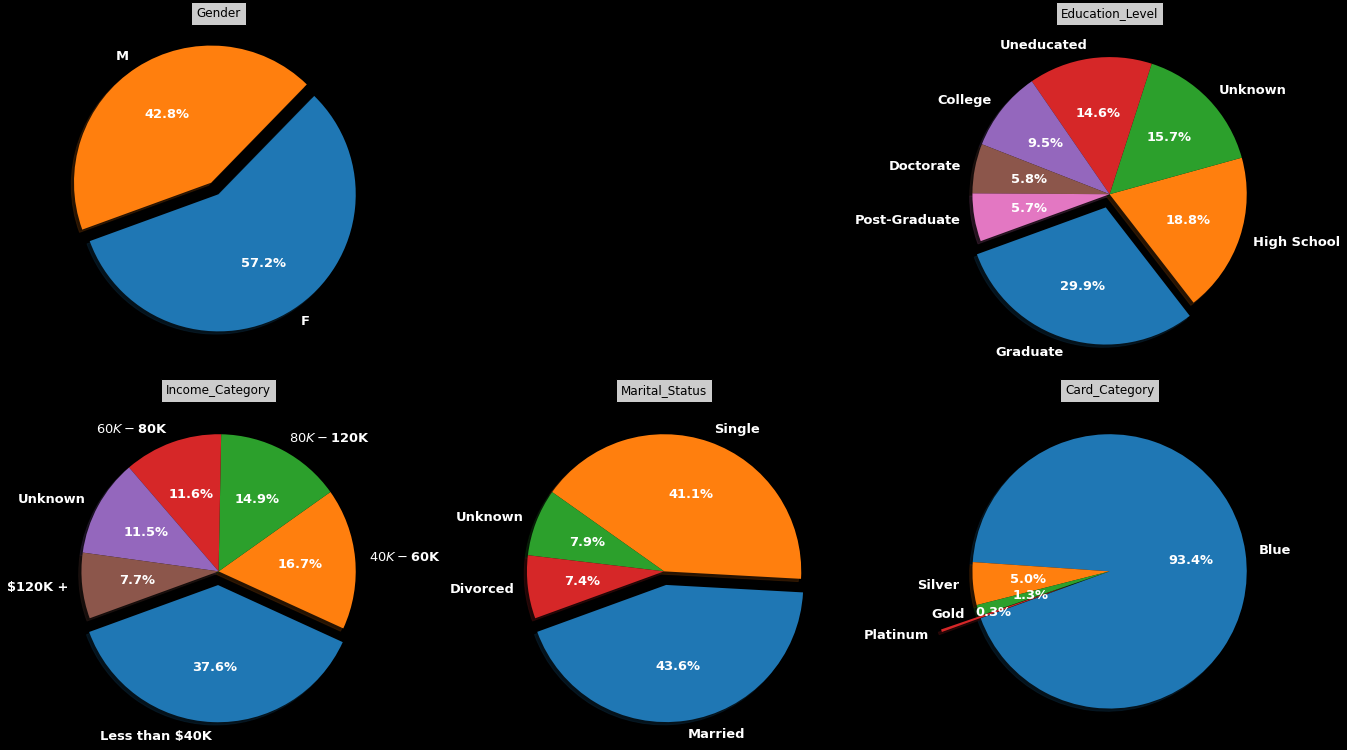

In [11]:
the_grid = GridSpec(2, 3)
fig = plt.figure(figsize=(20,20))
textprops={"color":"white","weight":"bold"}
plt.subplots_adjust(left=0.1, right=1, bottom=0.4, top=0.9, wspace=0.1, hspace=0.1)


plt.subplot(the_grid[0, 0], aspect=1)
data_Attrited['Gender'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200, fontsize=13,explode=(0,0.1),textprops=textprops)  
plt.title("Gender", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Gender")

plt.subplot(the_grid[0, 2], aspect=1)
data_Attrited['Education_Level'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200,explode=(0.1,0,0,0,0,0,0),fontsize=13,textprops=textprops) 
plt.title("Education_Level", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Education_Level")

plt.subplot(the_grid[1, 1], aspect=1)
data_Attrited['Marital_Status'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6),autopct='%1.1f%%',shadow = True, startangle=200,fontsize=13,explode=(0.1,0,0,0),textprops=textprops)  
plt.title("Marital_Status", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Marital_Status")

plt.subplot(the_grid[1, 0], aspect=1)
data_Attrited['Income_Category'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200,fontsize=13,explode=(0.1,0,0,0,0,0),textprops=textprops)
plt.title("Income_Category", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Income_Category",loc=4)

plt.subplot(the_grid[1, 2], aspect=1)
data_Attrited['Card_Category'].value_counts().plot(kind='pie',subplots=True,figsize=(6,6), autopct='%1.1f%%',shadow = True, startangle=200,  fontsize=13,textprops=textprops,explode=(0,0,0,0.3))
plt.title("Card_Category", bbox={'facecolor':'0.8', 'pad':5})
#plt.legend(title="Card_Category")

fig.set_facecolor('black')

### we observe that the results are the almost same either with all dataset or the attrited dataset!
### so we will keep all data for our study

In [12]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
data.loc[data['Customer_Age'] == 0, ['Customer_Age']].sum()

Customer_Age    0.0
dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


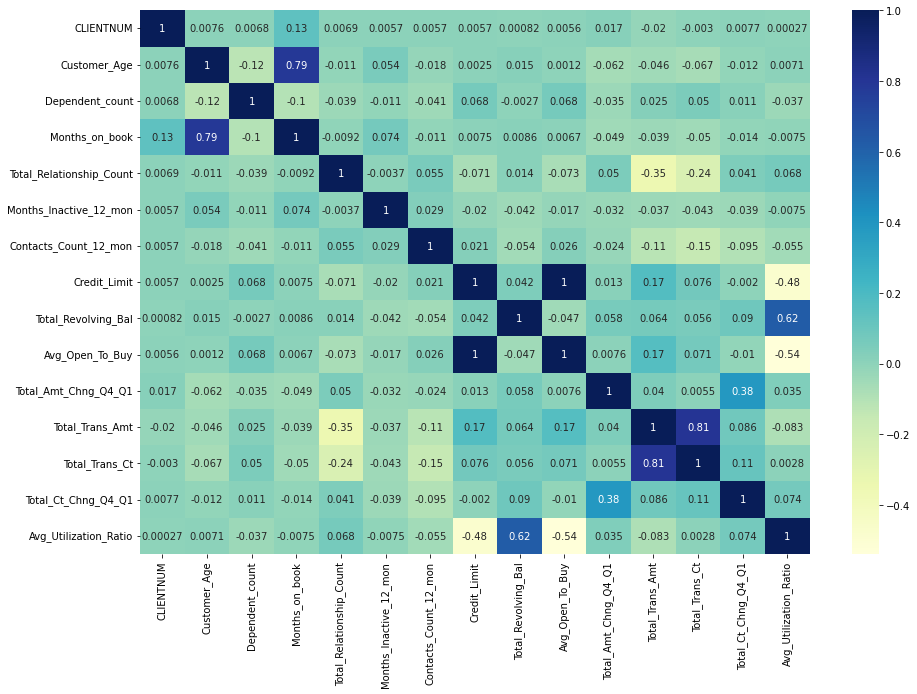

In [16]:
plt.figure(figsize=(15,10))
datacorr = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

#### now we will examine the correlation between Education_Level & Total_Revolving_Bal

In [17]:
educational_mean=data.groupby('Education_Level')['Total_Revolving_Bal'].mean().reset_index(name='Revolving_mean')

In [18]:
educational_mean.sort_values(by='Education_Level',ascending=False,ignore_index=False)
educational_mean

,Education_Level,Revolving_mean
0,College,1135.783810
1,Doctorate,1094.084257
2,Graduate,1162.380115
3,High School,1194.353204
4,Post-Graduate,1187.674419
5,Uneducated,1154.079354
6,Unknown,1160.449638


<AxesSubplot:xlabel='Education_Level', ylabel='Revolving_mean'>

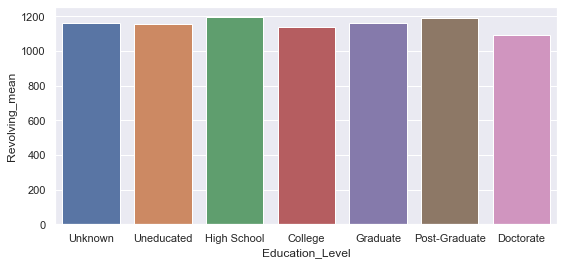

In [19]:
sns.set(rc={'figure.figsize':(9,4)})
sns.barplot(x='Education_Level',y='Revolving_mean',data = educational_mean,order=['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],ci=None)

#### People with doctorate tend to be more responsible with their revolving mean, but in general there is not a significant change into the different levels of education.

#### 1) now we will examine the correlation between Income_Category & Total_Revolving_Bal

In [20]:
income_mean_REV=data.groupby('Income_Category')['Total_Revolving_Bal'].mean().reset_index(name='Revolving_mean').sort_values(by='Revolving_mean',ascending=False)
income_mean_REV

,Income_Category,Revolving_mean
0,$120K +,1222.196699
3,$80K - $120K,1206.727036
1,$40K - $60K,1171.994413
2,$60K - $80K,1154.993581
4,Less than $40K,1145.136759
5,Unknown,1115.064748


In [21]:
income_mean_REV = income_mean_REV.drop(5)
income_mean_REV

,Income_Category,Revolving_mean
0,$120K +,1222.196699
3,$80K - $120K,1206.727036
1,$40K - $60K,1171.994413
2,$60K - $80K,1154.993581
4,Less than $40K,1145.136759


<AxesSubplot:xlabel='Income_Category', ylabel='Revolving_mean'>

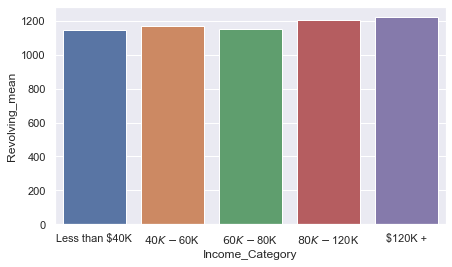

In [22]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(data = income_mean_REV, x='Income_Category', y='Revolving_mean',order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],ci=None)

It seems like there is a small trend in the revolving values, the higher the salary implies the higher the revolving value.
But does this mean that the people with higher salaries are less responsable? It's no necessary,we have to make the dept proportional.
For example, if you have an income of usd 20k and your revolving is usd 500 is not the same as someone with an income of 80k and a revolving of usd 500.
In order to make it more proportional we will divide the mean by the medium value of the income.
To do so we have to remove the unknown and consider as usd 140k the mid value of \usd 120k+ which is false, should be much higher but we can't have the mid value of usd 120k and infinite, so this value should work just as informative.

In [23]:
income_mean_REV['Revolving_median']=pd.Series([140,50,70,100,20])
income_mean_REV

,Income_Category,Revolving_mean,Revolving_median
0,$120K +,1222.196699,140
3,$80K - $120K,1206.727036,100
1,$40K - $60K,1171.994413,50
2,$60K - $80K,1154.993581,70
4,Less than $40K,1145.136759,20


In [24]:
income_mean_REV['propotional'] =income_mean_REV['Revolving_mean']/income_mean_REV['Revolving_median']
income_mean_REV.sort_values(by='propotional',ascending=False,inplace=True)
income_mean_REV

,Income_Category,Revolving_mean,Revolving_median,propotional
4,Less than $40K,1145.136759,20,57.256838
1,$40K - $60K,1171.994413,50,23.439888
2,$60K - $80K,1154.993581,70,16.499908
3,$80K - $120K,1206.727036,100,12.067270
0,$120K +,1222.196699,140,8.729976


[Text(0.5, 1.0, 'revolving blc')]

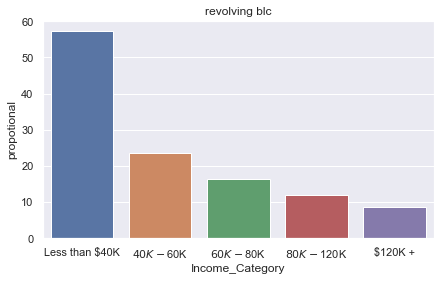

In [25]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(data = income_mean_REV, x='Income_Category', y='propotional',order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],ci=None).set(title='revolving blc')

#### now it's clear there is a  trend in the revolving proportional values, the higher the salary implies the higher responsibility about revolving value.

#### 2) now we will examine the correlation between Income_Category & Education_Level


In [26]:
income_educ=data.groupby('Income_Category',sort=True)['Education_Level'].value_counts().unstack()
income_educ

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Income_Category,,,,,,,
$120K +,70,37,204,147,30,119,120
$40K - $60K,183,70,553,355,111,249,269
$60K - $80K,132,59,422,307,77,195,210
$80K - $120K,175,57,478,308,81,217,219
Less than $40K,345,158,1139,671,170,522,556
Unknown,108,70,332,225,47,185,145


In [27]:
income_educ.index = pd.CategoricalIndex(income_educ.index, categories= ['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'])
income_educ.sort_index(level=0, inplace=True)
income_educ
income_educ =income_educ[['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']]
income_educ

Education_Level,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Income_Category,,,,,,,
Unknown,145,185,225,108,332,47,70
Less than $40K,556,522,671,345,1139,170,158
$40K - $60K,269,249,355,183,553,111,70
$60K - $80K,210,195,307,132,422,77,59
$80K - $120K,219,217,308,175,478,81,57
$120K +,120,119,147,70,204,30,37


In [28]:
for column in income_educ.columns:
    income_educ[column] = income_educ[column] / income_educ[column].sum()

In [29]:
income_educ

Education_Level,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Income_Category,,,,,,,
Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211
Less than $40K,0.366030,0.351042,0.333333,0.340573,0.364130,0.329457,0.350333
$40K - $60K,0.177090,0.167451,0.176354,0.180652,0.176790,0.215116,0.155211
$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.134910,0.149225,0.130820
$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
$120K +,0.078999,0.080027,0.073025,0.069102,0.065217,0.058140,0.082040


In [30]:
income_educ_propotional=income_educ.reset_index()
income_educ_propotional

Education_Level,Income_Category,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
0,Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211
1,Less than $40K,0.366030,0.351042,0.333333,0.340573,0.364130,0.329457,0.350333
2,$40K - $60K,0.177090,0.167451,0.176354,0.180652,0.176790,0.215116,0.155211
3,$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.134910,0.149225,0.130820
4,$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
5,$120K +,0.078999,0.080027,0.073025,0.069102,0.065217,0.058140,0.082040


Text(0.5, 1.0, 'Uneducated customers')

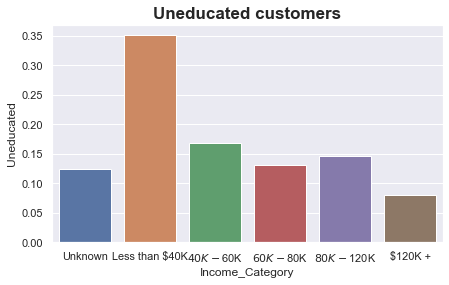

In [31]:
sns.set(rc={'figure.figsize':(7,4)})
u=sns.barplot(x='Income_Category',y='Uneducated',data = income_educ_propotional,ci=None)
u.set_title('Uneducated customers',fontsize=17,weight='bold')

Text(0.5, 1.0, 'Unknown customers')

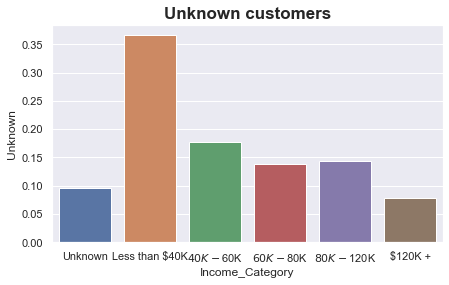

In [32]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Income_Category',y='Unknown',data = income_educ_propotional,ci=None).set_title('Unknown customers',fontsize=17,weight='bold')

Text(0.5, 1.0, 'Post-Graduate customers')

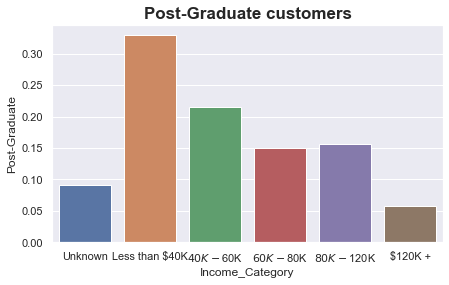

In [33]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Income_Category',y='Post-Graduate',data = income_educ_propotional,ci=None).set_title('Post-Graduate customers',fontsize=17,weight='bold')

Text(0.5, 1.0, 'High School customers')

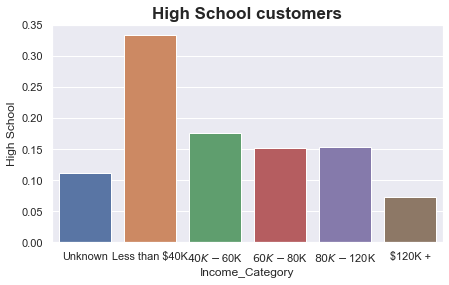

In [34]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Income_Category',y='High School',data = income_educ_propotional,ci=None).set_title('High School customers',fontsize=17,weight='bold')

Text(0.5, 1.0, 'Graduate customers')

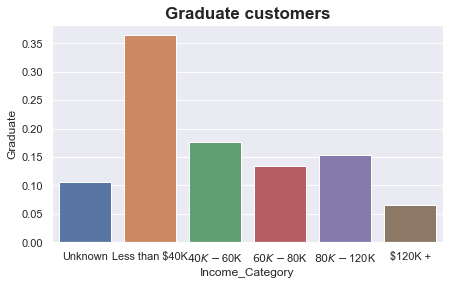

In [35]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Income_Category',y='Graduate',data =income_educ_propotional,ci=None).set_title('Graduate customers',fontsize=17,weight='bold')

Text(0.5, 1.0, 'Doctorate customers')

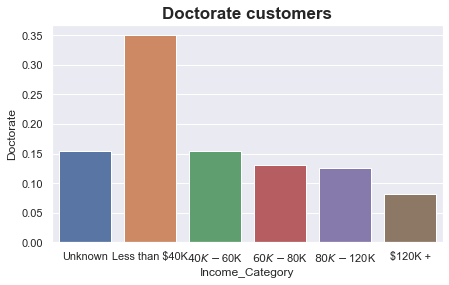

In [36]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Income_Category',y='Doctorate',data = income_educ_propotional,ci=None).set_title('Doctorate customers',fontsize=17,weight='bold')

Text(0.5, 1.0, 'College customers')

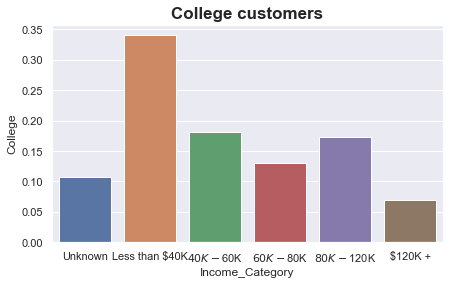

In [37]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Income_Category',y='College',data = income_educ_propotional,ci=None).set_title('College customers',fontsize=17,weight='bold')

In [38]:
income_educ

Education_Level,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Income_Category,,,,,,,
Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211
Less than $40K,0.366030,0.351042,0.333333,0.340573,0.364130,0.329457,0.350333
$40K - $60K,0.177090,0.167451,0.176354,0.180652,0.176790,0.215116,0.155211
$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.134910,0.149225,0.130820
$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
$120K +,0.078999,0.080027,0.073025,0.069102,0.065217,0.058140,0.082040


Text(0.5, 1.0, 'Less than $40K income')

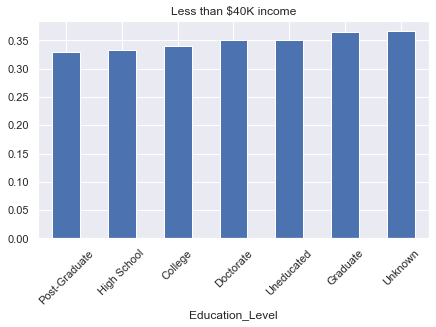

In [39]:
income_educ.loc['Less than $40K', :].sort_values(ascending=True).plot(kind='bar',rot=45).set_title('Less than $40K income')

Text(0.5, 1.0, '$40K - $60K')

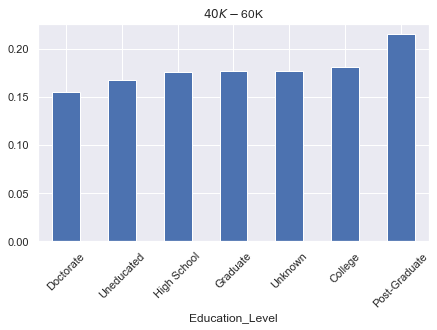

In [40]:
income_educ.loc['$40K - $60K', :].sort_values(ascending=True).plot(kind='bar',rot=45).set_title('$40K - $60K')

Text(0.5, 1.0, '$60K - $80K')

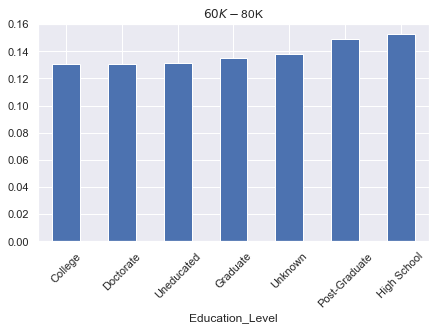

In [41]:
income_educ.loc['$60K - $80K', :].sort_values(ascending=True).plot(kind='bar',rot=45).set_title('$60K - $80K')

Text(0.5, 1.0, '$80K - $120K')

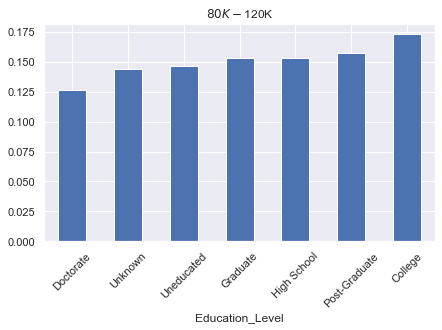

In [42]:
income_educ.loc['$80K - $120K', :].sort_values(ascending=True).plot(kind='bar',rot=45).set_title('$80K - $120K')

Text(0.5, 1.0, '$120K +')

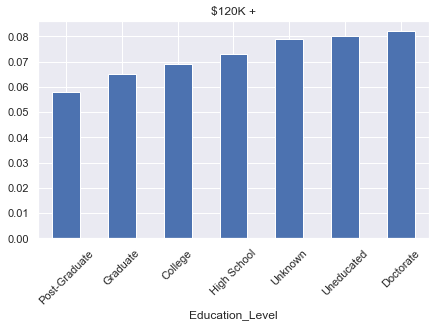

In [43]:
income_educ.loc['$120K +', :].sort_values(ascending=True).plot(kind='bar',rot=45).set_title('$120K +')

#### in general as the educational level is higher so and the income  but it's strange about undeducated in 80-120k is bigger than doctorate

In [44]:
income_educ

Education_Level,Unknown,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Income_Category,,,,,,,
Unknown,0.095458,0.124412,0.111773,0.106614,0.106138,0.091085,0.155211
Less than $40K,0.366030,0.351042,0.333333,0.340573,0.364130,0.329457,0.350333
$40K - $60K,0.177090,0.167451,0.176354,0.180652,0.176790,0.215116,0.155211
$60K - $80K,0.138249,0.131137,0.152509,0.130306,0.134910,0.149225,0.130820
$80K - $120K,0.144174,0.145931,0.153005,0.172754,0.152813,0.156977,0.126386
$120K +,0.078999,0.080027,0.073025,0.069102,0.065217,0.058140,0.082040


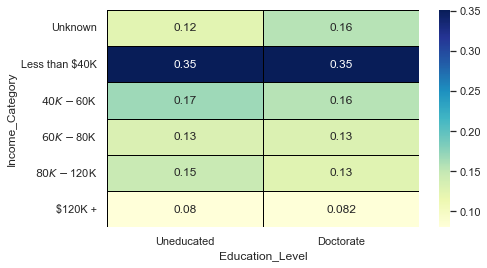

In [45]:
sns.heatmap(income_educ[['Uneducated','Doctorate']], annot=True,linewidths=.5,cmap="YlGnBu",linecolor='black')
sns.set(rc = {'figure.figsize':(6,7)})

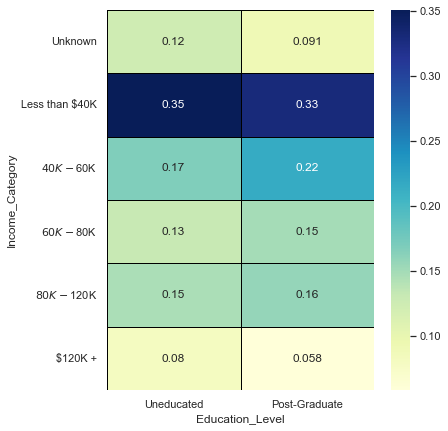

In [46]:
sns.heatmap(income_educ[['Uneducated','Post-Graduate']], annot=True,linewidths=.5,cmap="YlGnBu",linecolor='black')
sns.set(rc = {'figure.figsize':(6,7)})

### MALE-FEMALE

In [47]:
M_F=data[['Income_Category', 'Gender']]
M_F

,Income_Category,Gender
0,$60K - $80K,M
1,Less than $40K,F
2,$80K - $120K,M
3,Less than $40K,F
4,$60K - $80K,M
...,...,...
10122,$40K - $60K,M
10123,$40K - $60K,M
10124,Less than $40K,F
10125,$40K - $60K,M


In [48]:
M_F_C = M_F.groupby('Income_Category').Gender.value_counts().reset_index(name='growd').sort_values(by=['Income_Category'], ascending=False)
M_F_C

,Income_Category,Gender,growd
7,Unknown,F,1060
8,Unknown,M,52
5,Less than $40K,F,3284
6,Less than $40K,M,277
4,$80K - $120K,M,1535
3,$60K - $80K,M,1402
1,$40K - $60K,F,1014
2,$40K - $60K,M,776
0,$120K +,M,727


<AxesSubplot:xlabel='Income_Category', ylabel='growd'>

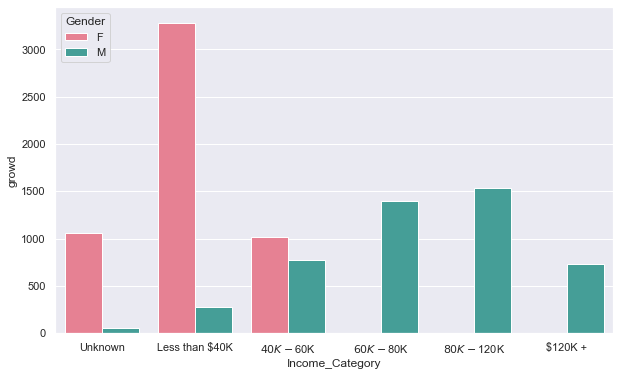

In [49]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Income_Category',y='growd', hue='Gender',data = M_F_C,order=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'], ci=None, palette="husl")

In [50]:
Exist_Gen=data[['Attrition_Flag','Gender']]
Exist_Gen

,Attrition_Flag,Gender
0,Existing Customer,M
1,Existing Customer,F
2,Existing Customer,M
3,Existing Customer,F
4,Existing Customer,M
...,...,...
10122,Existing Customer,M
10123,Attrited Customer,M
10124,Attrited Customer,F
10125,Attrited Customer,M


In [51]:
Exist_Gen1=Exist_Gen.groupby('Attrition_Flag').Gender.value_counts().reset_index(name='number')
Exist_Gen1

,Attrition_Flag,Gender,number
0,Attrited Customer,F,930
1,Attrited Customer,M,697
2,Existing Customer,F,4428
3,Existing Customer,M,4072


<AxesSubplot:xlabel='Attrition_Flag', ylabel='number'>

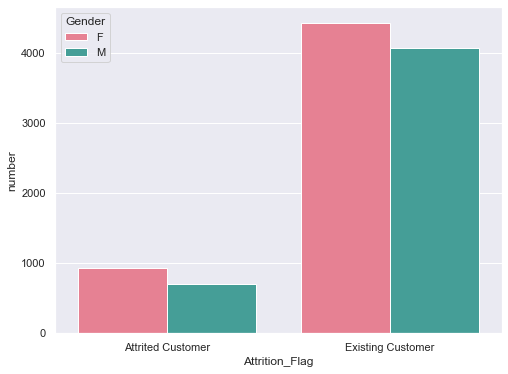

In [52]:
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='Attrition_Flag',y='number', hue='Gender',data =Exist_Gen1, ci=None, palette="husl")

In [53]:
Exist_Gen1

,Attrition_Flag,Gender,number
0,Attrited Customer,F,930
1,Attrited Customer,M,697
2,Existing Customer,F,4428
3,Existing Customer,M,4072


In [54]:
details = {
    'Attrition_Flag' : ['Attrited Customer','Attrited Customer','Existing Customer', 'Existing Customer'],
    'Gender':['F','M','F','M'],
    'Number':[930/(930+4428),697/(697+4072),4428/(930+4428),4072/(697+4072)],
    }

In [55]:
Exist_Gen1_prop = pd.DataFrame(details)  
Exist_Gen1_prop

,Attrition_Flag,Gender,Number
0,Attrited Customer,F,0.173572
1,Attrited Customer,M,0.146152
2,Existing Customer,F,0.826428
3,Existing Customer,M,0.853848


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Number'>

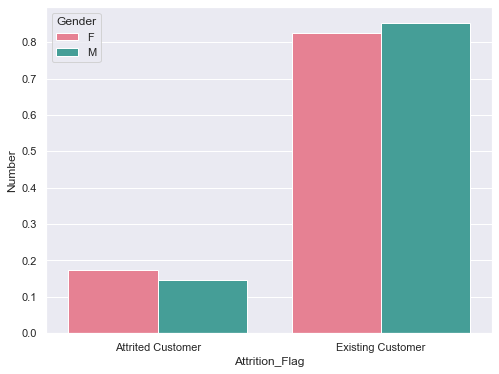

In [56]:
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(x='Attrition_Flag',y='Number', hue='Gender',data =Exist_Gen1_prop, ci=None, palette="husl")

# conclusion 

First, we checked if the studies have some impact on the salary income, and we discovered that for normal values the behave is how everybody would expect (more studies = more income). But then when we go to extreme the situation changes, like for people who earn more than $120k per year. We also checked the income difference between male and female, and we discovered that females in general earn less than males.
In the second place, we analysed how responsible are the customers with their debts. We found that the studies have no impact on the debt level. And on the other side, we saw that as people earn more money they use to have higher debts, but the effort to afford those debts is much lower.

The findings here are observational, not the result of a formal study. But this study can give you hints about the things that you can find and explore in this field.